In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [34]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.shape

(6362620, 11)

In [20]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [15]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [14]:
df[df['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


<AxesSubplot:>

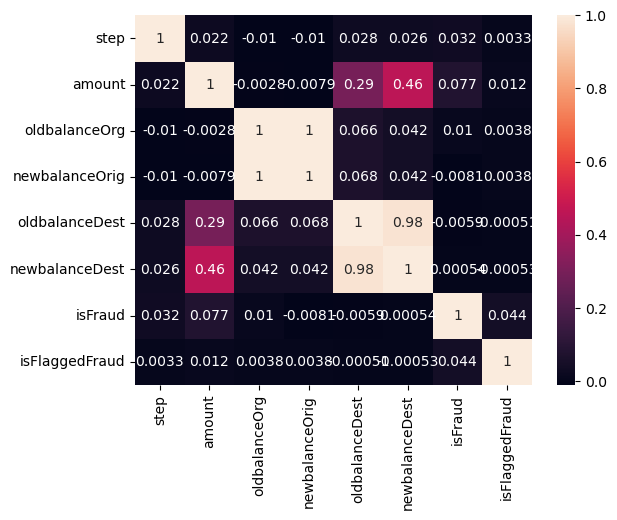

In [13]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

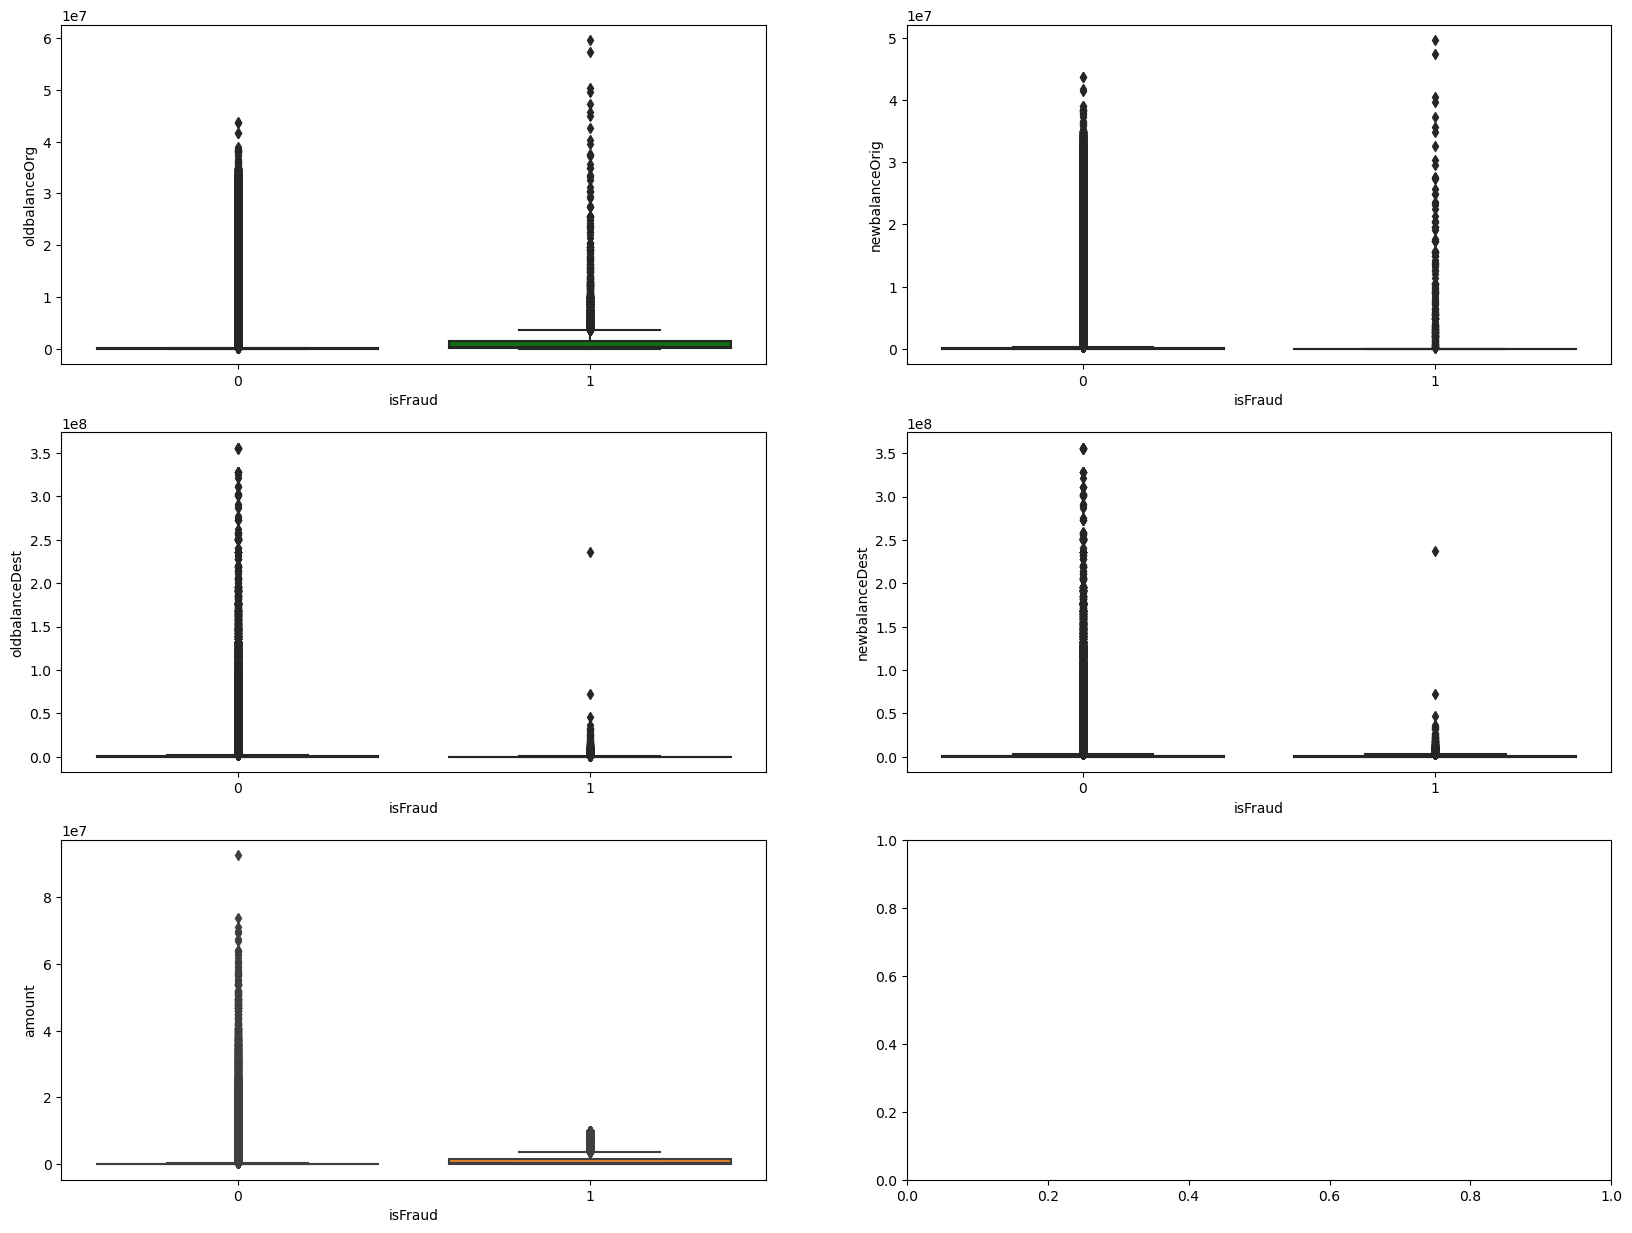

In [19]:
fig,ax=plt.subplots(3, 2, figsize=(20,15))

sns.boxplot(x ='isFraud',y='oldbalanceOrg',ax=ax[0,0],color='g',data =df)
sns.boxplot(x ='isFraud',y='newbalanceOrig',ax=ax[0,1],color='g',data =df)
sns.boxplot(x ='isFraud',y='oldbalanceDest',ax=ax[1,0],color='g',data =df)
sns.boxplot(x ='isFraud',y='newbalanceDest',ax=ax[1,1],color='g',data =df)
sns.boxplot(x='isFraud',y = 'amount',ax=ax[2,0],data=df)

In [35]:
type1 = pd.get_dummies(df.type,drop_first=True)

In [36]:
type1

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [37]:
df = pd.concat([type1,df],axis =1)

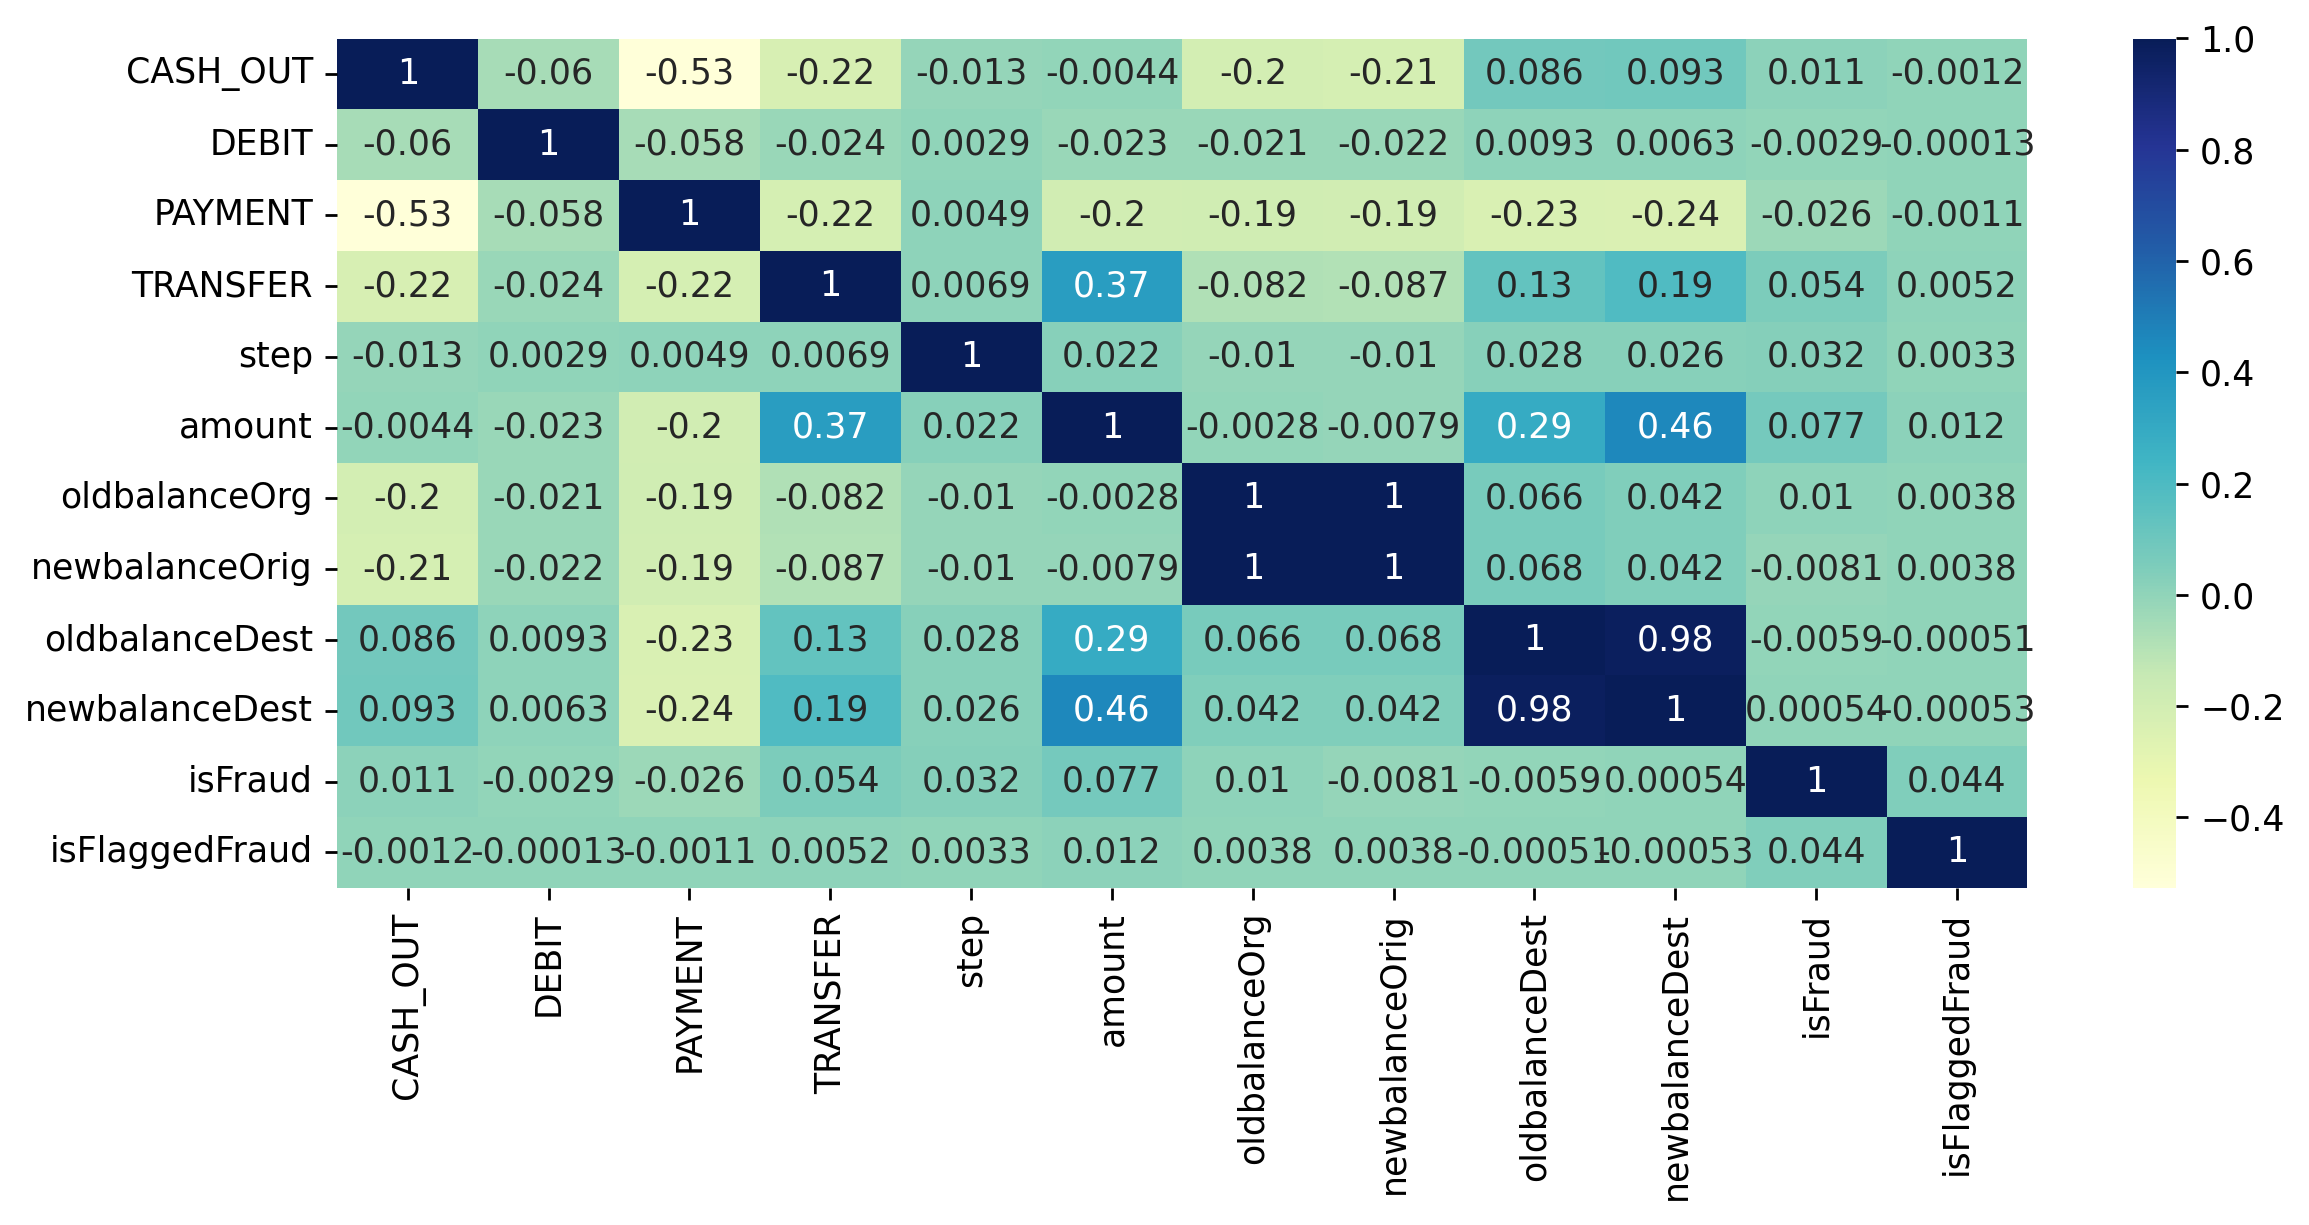

In [42]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.tight_layout()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [64]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
le = LabelEncoder()

In [46]:
df1 = df.drop(columns=['type','nameOrig','isFlaggedFraud'],axis=1)

In [47]:
df1

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,0,1,0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0
1,0,0,1,0,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0
2,0,0,0,1,1,181.00,181.00,0.00,C553264065,0.00,0.00,1
3,1,0,0,0,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1
4,0,0,1,0,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1,0,0,0,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,0,0,0,1,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,1,0,0,0,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,0,0,0,1,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1


In [56]:
x = df1.drop(axis =1,columns={'isFraud','nameDest'})
y = df1['isFraud']

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=1)

In [58]:
rf = RandomForestClassifier()

In [59]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541768
           1       0.98      0.78      0.87      3280

    accuracy                           1.00   2545048
   macro avg       0.99      0.89      0.93   2545048
weighted avg       1.00      1.00      1.00   2545048



In [61]:
print(rf.score(xtrain,ytrain))
rf.score(xtest,ytest)

0.9999997380534015


0.9996958799991199

In [63]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"Training accuracy: {model.score(xtrain,ytrain)}\nTesting accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

In [66]:
prediction(DecisionTreeClassifier())

Training accuracy: 1.0
Testing accuracy: 0.999684878241982
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541768
           1       0.88      0.88      0.88      3280

    accuracy                           1.00   2545048
   macro avg       0.94      0.94      0.94   2545048
weighted avg       1.00      1.00      1.00   2545048



1. Data cleaning including missing values, outliers and multi-collinearity.
- In this data set there in no missing values and same classification model no need to identitfy outliers and multi-collinearity. 
 

3. How did you select variables to be included in the model?
- independent column are CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,
  newbalanceDest and dependent column is IsFraud.
  
4. Demonstrate the performance of the model by using best set of tools.
- We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.

- Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

5. What are the key factors that predict fraudulent customer?
- Transaction history of vendors.

6. Do these factors make sense? If yes, How? If not, How not?
- yes,Transaction history show the account activity how much he/she Transfer(withdrawal,deposit) amount in month. in fraud case the amount transfer to another account and then withdrawal same amount.

7. What kind of prevention should be adopted while company update its infrastructure?
- Use smart vertified apps only.
- Browse through secured websites.
- Use secured internet connections.
- Keep your mobile and laptop security updated.
- Don't respond to unsolicited calls/SMS(s/E-mails).
- If you feel like you have been tricked or security compromised, contact your bank immidiately.

8. Assuming these actions have been implemented, how would you determine if they work
- Bank sending E-statements.
- Customers keeping a check of their account activity.
- Always keep a log of your payments.